In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

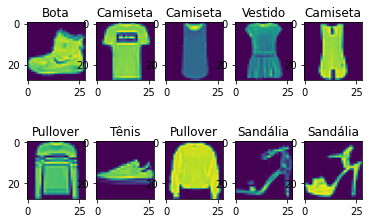

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

# plt.imshow(imagens_treino[0])
# plt.colorbar()

In [5]:
#normalização
imagens_treino = imagens_treino/float(255)

In [6]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
100/100 [==============================] - 5s 36ms/step - loss: 0.6436 - accuracy: 0.7742 - val_loss: 0.4440 - val_accuracy: 0.8436
Epoch 2/5
100/100 [==============================] - 3s 29ms/step - loss: 0.4313 - accuracy: 0.8480 - val_loss: 0.3976 - val_accuracy: 0.8623


In [7]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [8]:
pesos_camada_dense = modelo.layers[1].get_weights()
pesos_camada_dense

[array([[ 0.03922722, -0.03246992,  0.0132641 , ..., -0.01065311,
          0.04307262,  0.02043471],
        [-0.11103302,  0.00567445, -0.0138408 , ..., -0.01603158,
          0.02620315,  0.03959609],
        [ 0.01189083,  0.06887768, -0.10710289, ...,  0.07585694,
         -0.01300632,  0.06140493],
        ...,
        [ 0.04693559, -0.03684482, -0.02028013, ...,  0.12860969,
          0.01078831,  0.02156923],
        [ 0.04337093,  0.06789885, -0.00391709, ...,  0.08161777,
          0.02125105, -0.06901129],
        [-0.02774348, -0.03672547, -0.01470885, ..., -0.02044031,
          0.08370656, -0.00789079]], dtype=float32),
 array([ 0.06785292, -0.0047632 , -0.09764523,  0.07174052,  0.03085328,
        -0.12593274,  0.09770223,  0.00214396,  0.06628833, -0.00770453,
        -0.00128531, -0.01279586, -0.01918701,  0.02089686, -0.00741979,
        -0.01699049,  0.13383985,  0.10027809,  0.02076234, -0.04388484,
         0.11266579, -0.06448074,  0.0515498 ,  0.06529114, -0.024

In [12]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [13]:
# pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()

[array([[0.5323059 , 0.5227382 , 0.862794  , ..., 0.30814487, 0.39526796,
         0.19922982],
        [0.7182409 , 0.8979792 , 0.5673709 , ..., 0.52391136, 0.03926113,
         0.5536759 ],
        [0.09449773, 0.433022  , 0.85808897, ..., 0.7632813 , 0.4738233 ,
         0.27660516],
        ...,
        [0.33649394, 0.12419032, 0.5850469 , ..., 0.51929015, 0.16521838,
         0.27851936],
        [0.62430763, 0.22100657, 0.7752712 , ..., 0.6194557 , 0.8538095 ,
         0.8965639 ],
        [0.11856621, 0.02832099, 0.98900956, ..., 0.92698824, 0.03485946,
         0.52055174]], dtype=float32),
 array([ 0.06785292, -0.0047632 , -0.09764523,  0.07174052,  0.03085328,
        -0.12593274,  0.09770223,  0.00214396,  0.06628833, -0.00770453,
        -0.00128531, -0.01279586, -0.01918701,  0.02089686, -0.00741979,
        -0.01699049,  0.13383985,  0.10027809,  0.02076234, -0.04388484,
         0.11266579, -0.06448074,  0.0515498 ,  0.06529114, -0.02468698,
         0.01348193, -0.01525

In [14]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 57.1383 - accuracy: 0.4103 - val_loss: 9.9070 - val_accuracy: 0.7060
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 14.3920 - accuracy: 0.6188 - val_loss: 6.0539 - val_accuracy: 0.7067
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 6.1423 - accuracy: 0.6683 - val_loss: 2.0498 - val_accuracy: 0.7692
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 3.1173 - accuracy: 0.7001 - val_loss: 2.2599 - val_accuracy: 0.7356
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 1.7387 - accuracy: 0.7360 - val_loss: 1.0245 - val_accuracy: 0.8087


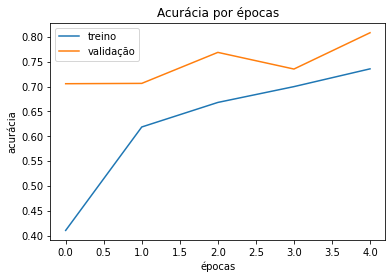

In [18]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

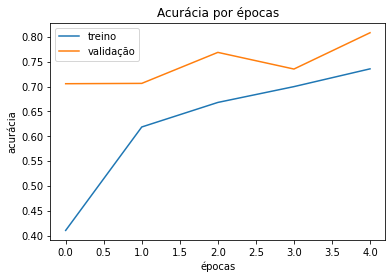

In [19]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [20]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

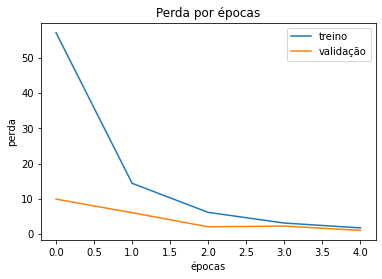

In [21]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [22]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

In [23]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

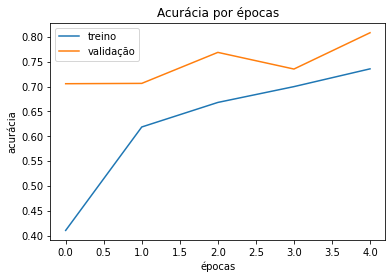

In [24]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

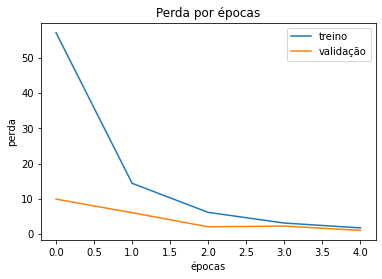

In [25]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [26]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 8
número da imagem de teste: 2
resultado teste modelo salvo: 8
número da imagem de teste: 2


In [27]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 4ms/step - loss: 20815.0566 - accuracy: 0.1000
Perda do teste: 20815.056640625
Acurácia do teste: 0.10000000149011612
